In [0]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Install libraries to google colab environment
!pip install hazm
!pip install stopwords_guilannlp
!pip install -U -q PyDrive
!pip install Unidecode
!pip3 install parsivar

     |████████████████████████████████| 317kB 9.5MB/s 
     |████████████████████████████████| 235kB 65.9MB/s 
     |████████████████████████████████| 1.4MB 58.9MB/s 
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp36-cp36m-linux_x86_64.whl size=154533 sha256=fbc4d3e1e66703ae4558e710654011d98986ce2b2e170c7dbe5963636b3ac021
  Stored in directory: /root/.cache/pip/wheels/66/15/54/4510dce8bb958b1cdd2c47425cbd1e1eecc0480ac9bb1fb9ab
  Created wheel for nltk: filename=nltk-3.3-cp36-none-any.whl size=1394470 sha256=3e3a720032401ac5ff49b86667b08d76eb5769505c62b66b200c540c20d91a6e
  Stored in directory: /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built libwapiti nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 245kB 9.1MB/s 
     |████████████████████████████████| 36.2MB 80kB/s 
     |████████████████████████████████| 1.2MB 4

In [0]:
# Import libraries
import json
import pandas as pd
import nltk
import numpy as np
# from __future__ import unicode_literals
from hazm import *
import pandas as pd
from collections import OrderedDict
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import collections
import re
from collections import Counter, defaultdict
from stopwords_guilannlp import stopwords_output
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from unidecode import unidecode
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [0]:
%cd/content/drive/My Drive
#category_df=pd.read_excel('Book3.xlsx')
category_df=pd.read_excel('2class.xlsx')
 
stoperr=pd.read_excel('f.stpoper1.xlsx')
category_df[:200]

/content/drive/My Drive


,KarbarName,SoalPasokh,Comment,tag
0,امیرارسلان علیقلی، نهم - گلپایگان,پاسخ کامنت,والا پارسال تیزهوشان بعضی از شهر ها(حتی شهرهای...,متفرقه
1,کاربر سایت,پاسخ کامنت,سلام خانم احمدی. رتبه منطقه 82. زیاد جالب نشد ...,متفرقه
2,کاربر سایت,پاسخ کامنت,تبریک میگم عالیه . البته من ک روم نمیشه بگم دو...,متفرقه
3,ریحانه محمدیان، چهارم تجربی - مشهد,پاسخ کامنت,واسم میزنه مشکل در اتصال ب سرور. من تلاش میکنم...,متفرقه
4,کاربر سایت,پاسخ کامنت,اسم خودتون رو سرچ کردم اورد و وارد پیجتون شدم,متفرقه
...,...,...,...,...
195,کاربر سایت,پاسخ کامنت,خانم تاپاک شما مگه ترازتون 8100 نیست ؟ خوب دیگ...,غیر متفرقه
196,کاربر سایت,پاسخ کامنت,حسین کوهزاد دانشجو معلم 👇 مدیر ثبت .,غیر متفرقه
197,مهسا تاپاک، چهارم انسانی - مراغه,پاسخ کامنت,اصلا معلوم نیس امسال چقدر پذیرش کنه بله ترازم8...,غیر متفرقه
198,کاربر سایت,پاسخ کامنت,پس چرا میگید امید الکی ندید؟ 😀دختر خوبحسین کو...,غیر متفرقه


In [0]:
#my_normalizer = Normalizer(statistical_space_correction=True,date_normalizing_needed=True)
#tokenized=(my_normalizer.normalize(x_cat_test['Comment'].values[0]))
#len(word_tokenize(tokenized))


In [0]:
category_le = LabelEncoder()
category_df['tag'] = category_le.fit_transform(category_df['tag'])
category_x = category_df[['KarbarName','Comment','SoalPasokh']].astype(str)
category_y = category_df['tag']


In [0]:
# Split for category predictor
#x_cat_train, x_cat_test, y_cat_train, y_cat_test = train_test_split(category_x, category_y, test_size=0.3)
#
x_cat_train=category_x[:int(len(category_x)*.7)]
y_cat_train=category_y[:int(len(category_x)*.7)]
x_cat_test=category_x[int(len(category_x)*.7):]
y_cat_test=category_y[int(len(category_x)*.7):]
print('--Category Predictor--')
print('Train size: ',len(x_cat_train))
print('Test size : ',len(x_cat_test))
unique, counts = np.unique(category_y[:], return_counts=True)
print('dict:',dict(zip(unique, counts)))


--Category Predictor--
Train size:  189031
Test size :  81014
dict: {0: 72581, 1: 197464}


In [0]:
import re

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', text)) # no emoji

This dog 😂
This dog 


# preprocess

In [0]:
stop_set = stopwords_output("Persian", "set")
customized_stop_words=list(stoperr['stop_word'].astype(str))
#customized_stop_words = ['&zwnj;','zwnj;','&zwnj', '&laquo;', '&raquo;', '&nbsp;', 'ViewAjax', 'asran', 'lse', 'pletely', 'secd', 'vent', 'ventDeult', 'ad_type', 'ads', 'advert', 'adverts', 'ajax', 'also', 'api', 'bull', 'cdn', 'click', 'clip', 'com', 'completely', 'data', 'disable', 'document', 'embed', 'enable', 'fa', 'false', 'feature', 'files', 'find', 'flowplayer', 'for', 'fp', 'function', 'height', 'hellip', 'http', 'if', 'ima', 'ir', 'keyboard', 'laquo', 'ldquo', 'lrm', 'max_ad_duration', 'mp4', 'nbsp', 'ndash', 'news', 'on', 'player_', 'playlist', 'post', 'pre', 'prevent', 'preventDefault', 'raquo', 'ratio', 'rdquo', 'ready', 'return', 'rlm', 'roll', 'sdmax', 'second', 'seeking', 'set', 'sources', 'splash', 'src', 'standardvideo', 'this', 'time', 'true', 'type', 'ui', 'up', 'var', 'via', 'video', 'videoViewAjax', 'width', 'www', 'zwnj']
customized_numbs = ['00', '10', '11', '12', '13', '1397', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '27', '28', '29', '2hzr', '30', '40', '45', '97']
# Remove some redundant words before tokenization and vectorization
from parsivar import Tokenizer
my_tokenizer = Tokenizer()
for num in customized_numbs:
  stop_set.add(num)

def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False
  
def sentence_preprocess(sentence):
  #
  #my_normalizer = Normalizer(statistical_space_correction=True,date_normalizing_needed=True)
  #tokenized=(my_normalizer.normalize(sentence))
  sentence=emoji_pattern.sub(r'', sentence)
  tokenized = (word_tokenize(sentence))
  #tokenized=my_tokenizer.tokenize_sentences(my_normalizer.normalize(sentence))
  tokens = []
  for word in tokenized:
    # Remove digits
    # Remove 1 letter words
    for sw in customized_stop_words:
      word = word.replace(sw, '')
    if not (word.isdigit() or isfloat(word) or len(word)<2 or (word in stop_set)):
      tokens.append(word)
  # Return as a string
  tokens = ' '.join(tokens)
  return tokens
def preprocess(data):
  data_list = []
  for sentence in data:
    data_list.append(sentence_preprocess(sentence))
  return data_list

# Vectorizer (Count Vectorzer | TF-IDF Vectorizer)

*   List item
*   List item


In [0]:
cat_vectorizer = TfidfVectorizer(lowercase=False, ngram_range=(1,1), min_df=0.005)
# train set
x_cat_train_corpus = x_cat_train['Comment'].values
x_cat_train_corpus = preprocess(x_cat_train_corpus)
# test set
x_cat_test_corpus = x_cat_test['Comment'].values
x_cat_test_corpus = preprocess(x_cat_test_corpus)
# Fit vectorizer
cat_vectorizer.fit(x_cat_train_corpus)
# Print vocabulary
cat_vocab = cat_vectorizer.get_feature_names()
print(cat_vocab)
print('Vocab length:', len(cat_vocab))
# Transform vectorizer over train and test set
x_cat_train_vec = cat_vectorizer.transform(x_cat_train_corpus).toarray()
x_cat_test_vec = cat_vectorizer.transform(x_cat_test_corpus).toarray()

['آز', 'آزاد', 'آمزش', 'ابتدایی', 'احتل', 'اختصاصی', 'اخر', 'اخه', 'اد', 'ادات', 'ار', 'ارد', 'اره', 'اس', 'اسم', 'اسه', 'اعل', 'افزایش', 'اقای', 'اقعا', 'ال', 'الله', 'الیت', 'انا', 'انایی', 'انتخاب', 'انج', 'انسانی', 'انشالله', 'انم', 'انی', 'اه', 'ایشالا', 'اینا', 'اینجری', 'ایی', 'ببخشید', 'بت', 'بتن', 'بخن', 'بخنم', 'بخنی', 'بخنید', 'بد', 'بدم', 'بدن', 'بدی', 'بدید', 'بزن', 'بزنم', 'بزنید', 'بستن', 'بستگی', 'بش', 'بشم', 'بشه', 'بع', 'بقیه', 'بم', 'بن', 'بنظرتن', 'بنید', 'بگ', 'بگم', 'بگه', 'بگید', 'بگین', 'تجر', 'تجه', 'تست', 'تضیح', 'تع', 'تغییر', 'تقری', 'تل', 'تم', 'تمم', 'تن', 'ته', 'تهن', 'تکمیل', 'تی', 'تیز', 'تیزه', 'ثبت', 'ثیر', 'جد', 'جع', 'جمع', 'جمله', 'جن', 'حت', 'حد', 'حدد', 'حرف', 'حس', 'حساب', 'حسین', 'حل', 'خابگاه', 'خارج', 'خاطر', 'خانم', 'خاهش', 'خاهشا', 'خد', 'خدا', 'خدت', 'خدتن', 'خدش', 'خدم', 'خسته', 'خش', 'خن', 'خندم', 'خندن', 'دارن', 'داره', 'دارین', 'دانشج', 'دانشجی', 'دانشگاه', 'دد', 'دره', 'دری', 'دست', 'دسن', 'دعا', 'دعت', 'دف', 'دل', 'دلتی', 'دلم', 'دن'

In [0]:
print('Shape of x_train vector for category predictor: ', x_cat_train_vec.shape)
print('Shape of x_test vector for category predictor: ', x_cat_test_vec.shape)

Shape of x_train vector for category predictor:  (189031, 347)
Shape of x_test vector for category predictor:  (81014, 347)


# Naive Bayes Implementation

In [0]:
#Prior probabilities for the classes
def class_probability(data):
  example_numb = len(data)
  prob = dict(Counter(data))
  for key in prob.keys():
    prob[key] = prob[key] / float(example_numb)
  return prob

def feature_probability(data, sum_of_words, V):
  # Calculating the sum of all weights (Count in CountVectorizer or TF-IDF value in TfidfVectorzier)
  sum_of_weights = 0.0
  for w in data:
    sum_of_weights += w
  # Calculating probabilty of this feature, using Add 1 Smoothing 
  p = (sum_of_weights + 1) / (sum_of_words + V)
  return p

def naive_bayes_train(x, y, voc):
  # x = x_train_vec, y = y_train, voc = vocab
  
  # Calculating probability of each class
  y_probability = class_probability(y)
  
  # List of all unique class
  y_classes = np.unique(y)
  print ('This model have %d class' % len(y_classes))
  
  # Shape of input
  x_rows, x_columns = x.shape
  print ('This model data have %d rows and %d columns' % (x_rows, x_columns))
  
  # Probabilites of each feature based on each class
  likelihoods = {}

  # Initialize
  for cls in y_classes:
    likelihoods[cls] = defaultdict(list)

  for cls in y_classes:
    # For every class
    # Find which doument category (y_train) is same as current class
    row_indices = np.where(y == cls)[0]
    
    # Get the documents (sentences vector)
    docs = x[row_indices, :]
    
    # Calculating all word weights
    sum_of_words = 0
    for d in docs:
      for v in d:
        sum_of_words += v
        
    # Remember the shape of this class (number of document and the length of vectors)
    doc_numb, vec_len  = np.shape(docs)
    
    # For every feature (word), add it's value to current class
    for i in range(0, vec_len):
      likelihoods[cls][i] += list(docs[:,i])
      
    # Calculate probablity of every feature given this class
    for i in range(0, vec_len):
      likelihoods[cls][i] = feature_probability(likelihoods[cls][i], sum_of_words, len(voc))
      
  return y_probability, likelihoods

def naive_bayes_test(x, y, class_prob, features_prob):
  
  prediction = {}
  y_list = list(y)
  
  # For every test data
  for i in range(0, len(x)):
    current_x = x[i]
    current_y = y_list[i]
    
    # A dictionary that contains prediction value based on each class
    current_prediction = {}
    for cls in class_prob.items():
      
      predict = 1
      
      # Multiply by probability of current class
      current_cls_index = cls[0]
      current_cls_value = cls[1]
      predict = predict * current_cls_value
      
      # For each feature (word) get the probability based on current class
      for index, word in enumerate(current_x):
        if word > 0 :
          word_probability = (features_prob[current_cls_index][index] ** word)
          predict = predict * word_probability
          
      # Add new predict to prediction list of this test data
      current_prediction[current_cls_index] = predict
      
    # Sort prediction
    sorted_by_value = sorted(current_prediction.items(), key=lambda kv: kv[1], reverse=True)
    
    # Add prediction list of this test data to global predictation list
    prediction[i] = sorted_by_value
    
  return prediction
def get_labels_of_prediction(pred, numb):
  result = {}
  for index, data in enumerate(pred.items()):
    labels = []
    for l in data[1]:
      labels.append(l[0])
    if numb == 'All':
      result[index] = labels
    else:
      result[index] = labels[0:numb]
  return result
 

In [0]:
p_class, p_features = naive_bayes_train(x_cat_train_vec, y_cat_train, cat_vocab)
# p_class is probability of each class
# print(p_class)
# p_features consist of probability of each feature based on each class
# print(p_features)
# Make prediction
prediction = naive_bayes_test(x_cat_test_vec, y_cat_test, p_class, p_features)
# print(prediction)

# Get the top N class (here is 1)
prediction_labels = get_labels_of_prediction(prediction, 1)
# print(prediction_labels)

# Convert to a single value list
y_cat_predicted = []
for p in prediction_labels.items():
  y_cat_predicted.append(p[1][0])
# print(y_cat_predicted)

# Convert real y_test to a list
y_cat_real = list(y_cat_test)
# print(y_cat_real)

This model have 2 class
This model data have 13368 rows and 251 columns


In [0]:
p_class

{0: 0.1830490724117295, 1: 0.8169509275882705}

In [0]:
print('Accuracy Score:', accuracy_score(y_cat_real, y_cat_predicted))
print('Precision Score:', precision_score(y_cat_real, y_cat_predicted, average='macro'))
print('Recall Score:', recall_score(y_cat_real, y_cat_predicted, average='macro'))
print('F1 Score:', f1_score(y_cat_real, y_cat_predicted, average='macro'))

Accuracy Score: 0.856369982547993
Precision Score: 0.8380323951141795
Recall Score: 0.6300117957647587
F1 Score: 0.6641336687872912


Confusion matrix, without normalization
[[ 286  759]
 [  64 4621]]
Normalized confusion matrix
[[0.27 0.73]
 [0.01 0.99]]


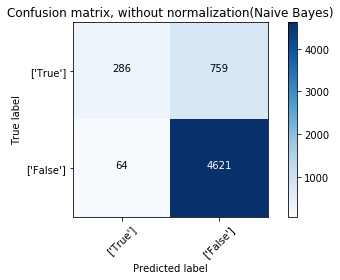

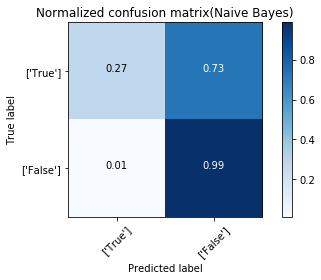

In [0]:

cnf_matrix = confusion_matrix(y_cat_real, y_cat_predicted)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization(Naive Bayes)')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,normalize=True,title='Normalized confusion matrix(Naive Bayes)')
plt.show()

## Baseline Models (Sklearn library)

> Indented block

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline

# When building the vocabulary ignore terms that have a document frequency strictly lower than
# the given threshold. This value is also called cut-off in the literature.
min_df = 0.005


# Tokenize function used in Vectorizer
def tokenize(text):
    return word_tokenize(text)


# (Multinomial) Naive Bayes Model
text_clf = Pipeline([('vect', CountVectorizer(tokenizer=tokenize,
                                              analyzer='word', ngram_range=(1, 2), min_df=min_df, lowercase=False)),
                     ('tfidf', TfidfTransformer(sublinear_tf=True)),
                     ('clf', MultinomialNB())])
text_clf = text_clf.fit(x_cat_train_corpus, y_cat_train)
naive_score = text_clf.score(x_cat_test_corpus, y_cat_test)
print('Naive Bayes Model: ', naive_score)
# SGD (Stochastic Gradient Descent) Model
text_clf_sgd = Pipeline([('vect', CountVectorizer(tokenizer=tokenize,
                                                  analyzer='word', ngram_range=(1, 2), min_df=min_df, lowercase=False)),
                         ('tfidf', TfidfTransformer(sublinear_tf=True)),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                                   alpha=1e-3, max_iter=5))])
text_clf_sgd = text_clf_sgd.fit(x_cat_train_corpus, y_cat_train)
sgd_score = text_clf_sgd.score(x_cat_test_corpus, y_cat_test)
print('SGD Model: ', sgd_score)

# Linear Support Vector Machine Model
text_clf_linear_svc = Pipeline([('vect', CountVectorizer(tokenizer=tokenize,
                                                         analyzer='word', ngram_range=(1, 2),
                                                         min_df=min_df, lowercase=False)),
                                ('tfidf', TfidfTransformer(sublinear_tf=True)),
                                ('clf-svm', LinearSVC(loss='hinge', penalty='l2',
                                                      max_iter=5))])

text_clf_linear_svc = text_clf_linear_svc.fit(x_cat_train_corpus,y_cat_train)
linear_svc_score = text_clf_linear_svc.score(x_cat_test_corpus,y_cat_test)
print('Linear SVC Model: ', linear_svc_score)

Naive Bayes Model:  0.8521815008726004


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGD Model:  0.8401396160558464
Linear SVC Model:  0.8465968586387435


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Confusion matrix, without normalization
[[ 154  891]
 [  25 4660]]
Normalized confusion matrix
[[0.15 0.85]
 [0.01 0.99]]


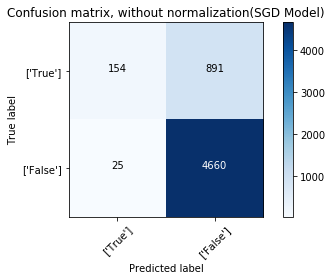

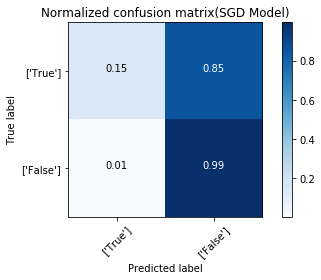

In [0]:
y_classes = text_clf_sgd.predict(x_cat_test_corpus)
cnf_matrix = confusion_matrix(y_cat_test, y_classes)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization(SGD Model)')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,normalize=True,title='Normalized confusion matrix(SGD Model)')
plt.show()

Confusion matrix, without normalization
[[ 294  751]
 [ 128 4557]]
Normalized confusion matrix
[[0.28 0.72]
 [0.03 0.97]]


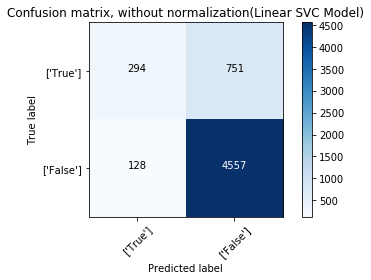

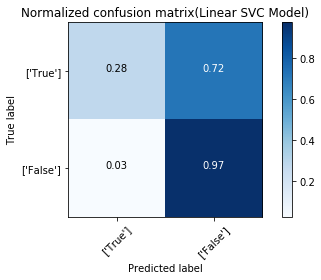

In [0]:
y_classes = text_clf_linear_svc.predict(x_cat_test_corpus)
cnf_matrix = confusion_matrix(y_cat_test, y_classes)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization(Linear SVC Model)')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,normalize=True,title='Normalized confusion matrix(Linear SVC Model)')
plt.show()

## Neural Network Model (Keras Bidirectional LSTM)

In [0]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
class_names=np.array([["True"], ["False"]])
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [0]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Convolution1D,BatchNormalization,Convolution2D
from keras.layers import CuDNNLSTM
from keras.models import Sequential
from keras.layers import Flatten,TimeDistributed,LocallyConnected1D
from keras.layers.convolutional import Conv1D
from keras.models import Model
from keras import optimizers
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
from keras.metrics import categorical_accuracy
from keras.utils import plot_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from gensim.models import KeyedVectors
import codecs
lstm_x_train = (x_cat_train['Comment']).values#x_cat_train['SoalPasokh']+ x_cat_train['KarbarName']+
lstm_x_train = preprocess(lstm_x_train)
# test set
lstm_x_test = (x_cat_test['Comment']).values#x_cat_test['SoalPasokh']+ x_cat_test['KarbarName']+
lstm_x_test = preprocess(lstm_x_test)
num_words = 80000

# create the tokenizer
tokenizer = Tokenizer(num_words=num_words)

# fit the tokenizer on the documents
tokenizer.fit_on_texts(x_cat_train_corpus)

# sequence encode
encoded_docs = tokenizer.texts_to_sequences(lstm_x_train)
word_counts=tokenizer.word_counts
word_index=tokenizer.word_index
# pad sequences
max_length = max([len(s.split()) for s in lstm_x_train])
x_train_padded = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

# define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index)+ 1

encoded_docs  =tokenizer.texts_to_sequences(lstm_x_test)
x_test_padded = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [0]:
from imblearn.over_sampling import SMOTE, ADASYN,RandomOverSampler
x_train_padded, y_cat_train = RandomOverSampler().fit_resample(x_train_padded, y_cat_train)

In [0]:
y_cat_train_classes = np.unique(category_y)
y_cat_train_classes_len = len(y_cat_train_classes)
y_cat_test_classes = np.unique(category_y)
y_cat_test_classes_len = len(y_cat_test_classes)

In [0]:
unique, counts = np.unique(category_y[:], return_counts=True)
w=dict(zip(unique, counts))
for i in range(len(w)):
    macx=w[max(w.keys(), key=(lambda k: w[k)])]
    w[i]=macx/w[i]

1951

In [0]:
#,class_weight=w

In [53]:
import keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
categorical_y_train = to_categorical(y_cat_train, y_cat_train_classes_len)
categorical_y_test = to_categorical(y_cat_test, y_cat_test_classes_len)
model = Sequential()
model.add(Embedding(vocab_size, 512, input_length=max_length))
model.add(keras.layers.BatchNormalization())
model.add(Conv1D(filters=32, kernel_size=20,strides=5, padding='valid', activation='relu',kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Conv1D(filters=32, kernel_size=10,strides=2, padding='valid', activation='relu',kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(MaxPooling1D(pool_size=2))
model.add(keras.layers.BatchNormalization())
model.add(Conv1D(filters=32, kernel_size=5, padding='valid', activation='relu',kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(Conv1D(filters=32, kernel_size=3 ,padding='valid', activation='relu',kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(MaxPooling1D(pool_size=2))
model.add(keras.layers.BatchNormalization())
model.add(Bidirectional(CuDNNLSTM(512, return_sequences=True, name='lstm_layer')))
model.add(Bidirectional(CuDNNLSTM(256, return_sequences=True,name='lstm_layer2')))
model.add(GlobalMaxPool1D())
#model.add(Bidirectional(CuDNNLSTM(100, return_sequences=False,name='lstm_layer3')))
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(y_cat_train_classes_len, activation="softmax"))
#model.add(CRF(y_cat_train_classes_len, sparse_target=False))
#model.compile(loss='categorical_crossentropy',
 #             optimizer='adam',
  #            metrics=[categorical_accuracy])
# Let's train the model using RMSprop
model.compile(optimizers.Adam(0.001,amsgrad=True), loss='binary_crossentropy', metrics=['acc'])
model.summary()
batch_size = 128
epochs = 24
earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='max')
mcp_save = ModelCheckpoint('nm.hdf5', save_best_only=True, monitor='val_loss', mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=2, mode='max')
callbacks=[earlyStopping, mcp_save, reduce_lr_loss]
callbacks=callbacks
#model.compile(optimizers.Adam(0.001), crf.loss_function, metrics=[crf.accuracy])
hist = model.fit(x_train_padded, categorical_y_train, batch_size=batch_size, callbacks=callbacks,shuffle=True,epochs=epochs)#,class_weight=w
loss, acc = model.evaluate(x_test_padded, categorical_y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1855, 512)         39963136  
_________________________________________________________________
batch_normalization_10 (Batc (None, 1855, 512)         2048      
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 368, 32)           327712    
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 180, 32)           10272     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 90, 32)            0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 90, 32)            128       
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 86, 32)           

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning
/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:707: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


Epoch 2/24
   128/277694 [..............................] - ETA: 6:24 - loss: 0.5231 - acc: 0.8359

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1379: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


277694/277694 [==============================] - 377s 1ms/step - loss: 0.5389 - acc: 0.8030
Epoch 3/24
277694/277694 [==============================] - 377s 1ms/step - loss: 0.4703 - acc: 0.8360
Epoch 4/24
277694/277694 [==============================] - 377s 1ms/step - loss: 0.4244 - acc: 0.8548
Epoch 5/24
277694/277694 [==============================] - 377s 1ms/step - loss: 0.3938 - acc: 0.8666
Epoch 6/24
277694/277694 [==============================] - 377s 1ms/step - loss: 0.3720 - acc: 0.8741
Epoch 7/24
277694/277694 [==============================] - 377s 1ms/step - loss: 0.4306 - acc: 0.8709
Epoch 8/24
277694/277694 [==============================] - 377s 1ms/step - loss: 0.3640 - acc: 0.8810
Epoch 9/24
277694/277694 [==============================] - 377s 1ms/step - loss: 0.3429 - acc: 0.8829
Epoch 10/24
277694/277694 [==============================] - 378s 1ms/step - loss: 0.3129 - acc: 0.8917
Epoch 11/24
277694/277694 [==============================] - 376s 1ms/step - loss: 

In [0]:
import pandas as pd

## convert your array into a dataframe
df = pd.DataFrame (y_classes)

## save to xlsx file

filepath = 'my_excel_file.xlsx'

df.to_excel(filepath, index=False)

Confusion matrix, without normalization
[[12030 10367]
 [11627 46990]]
Normalized confusion matrix
[[0.54 0.46]
 [0.2  0.8 ]]


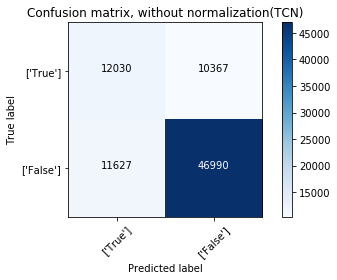

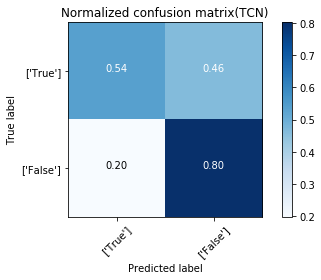

In [0]:
y_prob = model.predict(x_test_padded) 
y_classes = y_prob.argmax(axis=-1)
cnf_matrix = confusion_matrix(y_cat_test, y_classes)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization(TCN)')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,normalize=True,title='Normalized confusion matrix(TCN)')
plt.show()

Confusion matrix, without normalization
[[ 556  301]
 [ 342 2899]]
Normalized confusion matrix
[[0.65 0.35]
 [0.11 0.89]]


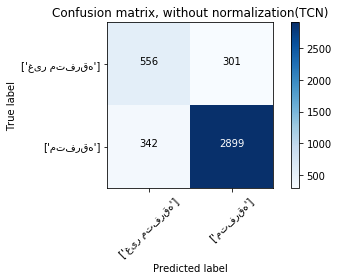

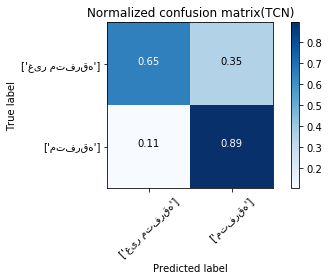

In [0]:
cnf_matrix = confusion_matrix(y_cat_test, y_classes)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization(TCN)')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,normalize=True,title='Normalized confusion matrix(TCN)')
plt.show()

# AttentionWeightedAverage+lstm

1.   List item
2.   List item



In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
from keras.models import Model, Input
from keras.layers import Dense, LSTM, Dropout, Embedding, SpatialDropout1D, Bidirectional, concatenate, InputSpec
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
import regex as re
import pickle
import numpy as np

from keras.engine.topology import Layer
from keras import initializers as initializers, regularizers, constraints
from keras import backend as K


        
        
class AttentionWeightedAverage(Layer):
    """
    Computes a weighted average attention mechanism from:
        Zhou, Peng, Wei Shi, Jun Tian, Zhenyu Qi, Bingchen Li, Hongwei Hao and Bo Xu.
        “Attention-Based Bidirectional Long Short-Term Memory Networks for Relation Classification.”
        ACL (2016). http://www.aclweb.org/anthology/P16-2034
    How to use:
    see: [BLOGPOST]
    """

    def __init__(self, return_attention=False, **kwargs):
        self.init = initializers.get('uniform')
        self.supports_masking = True
        self.return_attention = return_attention
        super(AttentionWeightedAverage, self).__init__(** kwargs)

    def build(self, input_shape):
        self.input_spec = [InputSpec(ndim=3)]
        assert len(input_shape) == 3

        self.w = self.add_weight(shape=(input_shape[2], 1),
                                 name='{}_w'.format(self.name),
                                 initializer=self.init)
        self.trainable_weights = [self.w]
        super(AttentionWeightedAverage, self).build(input_shape)

    def call(self, h, mask=None):
        h_shape = K.shape(h)
        d_w, T = h_shape[0], h_shape[1]
        
        logits = K.dot(h, self.w)  # w^T h
        logits = K.reshape(logits, (d_w, T))
        alpha = K.exp(logits - K.max(logits, axis=-1, keepdims=True))  # exp
        
        # masked timesteps have zero weight
        if mask is not None:
            mask = K.cast(mask, K.floatx())
            alpha = alpha * mask
        alpha = alpha / K.sum(alpha, axis=1, keepdims=True) # softmax
        r = K.sum(h * K.expand_dims(alpha), axis=1)  # r = h*alpha^T
        h_star = K.tanh(r)  # h^* = tanh(r)
        if self.return_attention:
            return [h_star, alpha]
        return h_star

    def get_output_shape_for(self, input_shape):
        return self.compute_output_shape(input_shape)

    def compute_output_shape(self, input_shape):
        output_len = input_shape[2]
        if self.return_attention:
            return [(input_shape[0], output_len), (input_shape[0], input_shape[1])]
        return (input_shape[0], output_len)

    def compute_mask(self, input, input_mask=None):
        if isinstance(input_mask, list):
            return [None] * len(input_mask)
        else:
            return None

In [0]:
import keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Model, Input
categorical_y_train = to_categorical(y_cat_train, y_cat_train_classes_len)
categorical_y_test = to_categorical(y_cat_test, y_cat_test_classes_len)
input_text = Input((max_length,))

xv=Embedding(vocab_size, 512, input_length=max_length)(input_text)
xv=Conv1D(filters=32, kernel_size=3, padding='valid', activation='relu',kernel_regularizer=keras.regularizers.l1_l2(l1=0.0001, l2=0.0001))(xv)
Conv1D(filters=32, kernel_size=3, padding='valid', activation='relu',kernel_regularizer=keras.regularizers.l1_l2(l1=0.00001, l2=0.00001))(xv)
xv=MaxPooling1D(pool_size=2)(xv)
xv=Bidirectional(CuDNNLSTM(512, return_sequences=True, name='lstm_layer'))(xv)
xv=Bidirectional(CuDNNLSTM(256, return_sequences=True,name='lstm_layer2'))(xv)
xv, attn = AttentionWeightedAverage(return_attention=True)(xv)
#xv=GlobalMaxPool1D()(xv)
#model.add(Bidirectional(CuDNNLSTM(100, return_sequences=False,name='lstm_layer3')))
xv=Dropout(0.5)(xv)
xv=Dense(100, activation="relu")(xv)
xv=Dense(y_cat_train_classes_len, activation="softmax")(xv)
model = Model(input_text, xv)
model.compile(optimizers.Adam(0.001,amsgrad=True), loss='binary_crossentropy', metrics=['acc'])
model.summary()
batch_size = 128
epochs = 20
earlyStopping = EarlyStopping(monitor='val_acc', patience=20, verbose=0, mode='max')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_acc', mode='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_acc', factor=0.8, patience=2, mode='max')
callbacks=[earlyStopping, mcp_save, reduce_lr_loss]
callbacks=callbacks
#model.compile(optimizers.Adam(0.001), crf.loss_function, metrics=[crf.accuracy])
hist = model.fit(x_train_padded, categorical_y_train, batch_size=batch_size,shuffle=False, epochs=epochs,class_weight=w)#,class_weight=w
loss, acc = model.evaluate(x_test_padded, categorical_y_test, verbose=0)
print('Test Accuracy: %f' % (acc*100))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 79)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 79, 512)           11288064  
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 77, 32)            49184     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 38, 32)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 38, 1024)          2236416   
_____________________________________________

In [0]:
y_prob = model.predict(x_test_padded) 
y_classes = y_prob.argmax(axis=-1)
cnf_matrix = confusion_matrix(y_cat_test, y_classes)
cnf_matrix

array([[ 674,  371],
       [ 444, 4241]])

Confusion matrix, without normalization
[[ 674  371]
 [ 444 4241]]
Normalized confusion matrix
[[0.64 0.36]
 [0.09 0.91]]


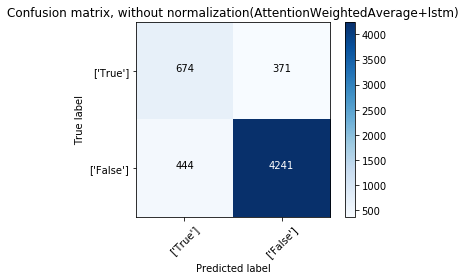

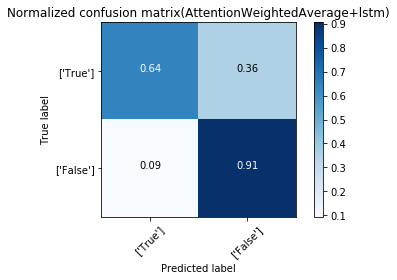

In [0]:
cnf_matrix = confusion_matrix(y_cat_test, y_classes)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization(AttentionWeightedAverage+lstm)')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,normalize=True,title='Normalized confusion matrix(AttentionWeightedAverage+lstm)')
plt.show()

# *False detection 

In [0]:

for i in range(len(y_classes)):
  if y_classes[i]==list(y_cat_test)[i]:
    if list(y_cat_test)[i]==0:
      print(x_cat_test.values[i], list(y_cat_test.values)[i])



['کاربر سایت'
 'در تک یاخته ای\u200cها در تبادل گازهای تنفسی بقیه مولکول\u200cهای گازی هم وارد سلول میشوند؟'
 'کامنت'] 0
['رامیار کیخسروی، تجربى نظام جدید -  مهاباد - میانگین تراز 6757'
 'من موقع تست زدن بعد هر تست پاسخنامه رو چک میکنم.خیلی\u200cها مخالف این کار هستن ولی روی من جواب میده و سرعتم در تست زدن بیشتر میشه.البته باید مراقب بود جواب بقیه سوالات رو نبینی من با کاغذ میپوشونم.دلیلم برای این کار این که وقتی ی تست رو میزنی اگر بلافاصله تحلیل کنی تمام راه حل یا گزینه\u200cها هنوز توی ذهنت هستن و زمان تحلیل به شدت کاهش پیدا میکنه.البته این برای آموزش و تست زمان دار هم باید زده بشه.برای دینی هم کار شما رو انجام میدم.'
 'پاسخ کامنت'] 0
['پردیس رضایی مرام، تجربى نظام جدید -  ایذه - میانگین تراز 6318'
 '💠 چند مورد صحیح است؟ 1_ کمبود نوعی پروتیین می\u200cتواند باعث کاهش رنگ ادرار شود//2_ افزایش میزان نوعی آنزیم در خون همانند افزایش نوعی هورمون میتواند سبب پر رنگ\u200cتر شدن ادرار شود // 3_ هر فردی که در آن دفع مواد زائد نیتروژن دار بیش از حد طبیعی باشد مبتلا به نوعی بیماری خودایمنی است /